### HEADER ###

In [1]:
# Import Libraries
import pandas as pd
import scipy.stats as sci
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib import pyplot as plt

### CLEANING ###

In [4]:
# Import everything
palsy_c = pd.read_csv('../Datasets/PalsyConstipated.csv').rename(columns={'Palsy Constipated QOLS':'QOLS'}).set_index('ID').drop(columns='Constipated')
palsy_nc = pd.read_csv('../Datasets/PalsyNonConstipated.csv').rename(columns={'Palsy Non-Constipated QOLS':'QOLS'}).set_index('ID').drop(columns='Constipated')
control_c = pd.read_csv('../Datasets/ControlConstipated.csv').rename(columns={'Control Constipated QOLS':'QOLS'}).set_index('ID').drop(columns='Unnamed: 15')
control_nc = pd.read_csv('../Datasets/ControlNonConstipated.csv').rename(columns={'Control Non-Constipated QOLS':'QOLS'}).set_index('ID')

In [5]:
# Standardize Cytokine column names
palsy_c.rename(inplace=True,columns=
                {
                    'IL1 B':'IL1B',
                    'IL-6':'IL6',
                    'IL-8':'IL8',
                    'IL-10':'IL10',
                    'IL-1B':'IL1B',
                    'TNF-Alpha':'TNFAlpha',
                    'Palsy Constipated QOLS':'QOLS'
                })
palsy_nc.rename(inplace=True,columns=
                {
                    'IL1 B':'IL1B',
                    'IL-6':'IL6',
                    'IL-8':'IL8',
                    'IL-10':'IL10',
                    'IL-1B':'IL1B',
                    'TNF-Alpha':'TNFAlpha',
                    'Palsy Constipated QOLS':'QOLS'
                })

In [6]:
# Make a general palsy dataframe
palsy = palsy_c.append(palsy_nc,sort=True)
palsy.shape

(63, 19)

In [7]:
# Make a general control dataframe
control = control_c.append(control_nc,sort=True)

In [8]:
# Make an overall dataframe
data = pd.concat([palsy,control],sort=False).dropna(how='all')
data.drop(data.tail(1).index,inplace=True)

### PRE-CLEANED ###

In [2]:
data = pd.read_csv('../Datasets/clean.csv')

### ANALYSIS ###

In [3]:
medication_dict = {
    1:'GABA+',
    2:'GABA',
    3:'Na Inhibitor',
    4:'Ca Inhibitor'
}
data_medication = data[data['MEDICATION'] != 0]

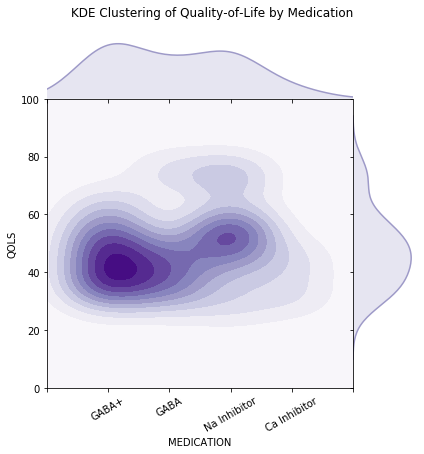

In [5]:
med = sns.jointplot(data=data_medication,x='MEDICATION', y='QOLS', kind='kde',xlim=(0,5),ylim=(0,100),n_levels=10,
                    cmap='Purples',space=0,marginal_kws={'color':'#9E9AC8'})
med.ax_joint.set_xticklabels(['',*medication_dict.values()],rotation=30)
med.ax_joint.set_facecolor('#F8F6FA')
med.fig.subplots_adjust(top=.9)
med.fig.suptitle('KDE Clustering of Quality-of-Life by Medication')
plt.savefig('../Figures/medication_kde.png')
plt.show()

In [6]:
c_data = data_medication[data_medication['CONSTIPATION'] == True]
nc_data = data_medication[data_medication['CONSTIPATION'] == False]

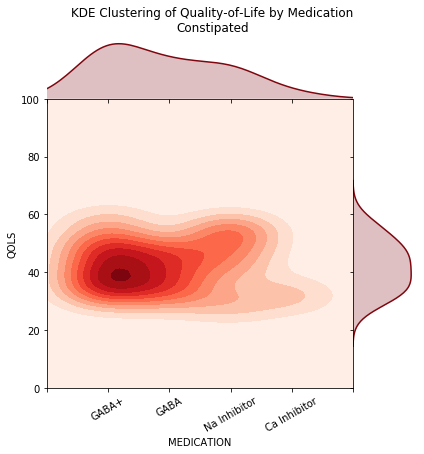

In [7]:
c_med = sns.jointplot(data=c_data,x='MEDICATION', y='QOLS', kind='kde',xlim=(0,5),ylim=(0,100),n_levels=10,
                    cmap='Reds',space=0,marginal_kws={'color':'#7E060F'})
c_med.ax_joint.set_xticklabels(['',*medication_dict.values()],rotation=30)
c_med.ax_joint.set_facecolor('#FFEEE6')
c_med.fig.subplots_adjust(top=.9)
c_med.fig.suptitle('KDE Clustering of Quality-of-Life by Medication\nConstipated')
plt.savefig('../Figures/medication_kde_c.png')
plt.show()

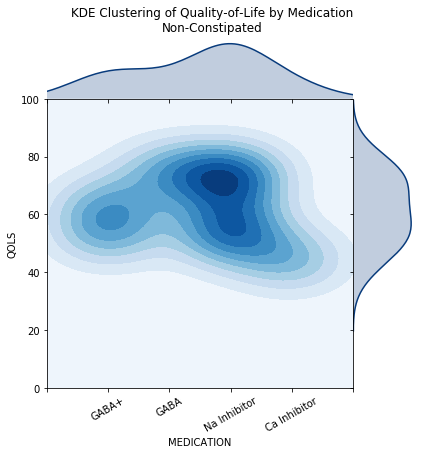

In [8]:
nc_med = sns.jointplot(data=nc_data,x='MEDICATION', y='QOLS', kind='kde',xlim=(0,5),ylim=(0,100),n_levels=10,
                    cmap='Blues',space=0,marginal_kws={'color':'#083B7C'})
nc_med.ax_joint.set_xticklabels(['',*medication_dict.values()],rotation=30)
nc_med.ax_joint.set_facecolor('#EEF5FC')
nc_med.fig.subplots_adjust(top=.9)
nc_med.fig.suptitle('KDE Clustering of Quality-of-Life by Medication\nNon-Constipated')
plt.savefig('../Figures/medication_kde_nc.png')
plt.show()

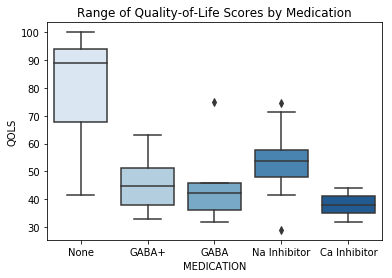

In [9]:
med_box = sns.boxplot(data=data,x='MEDICATION',y='QOLS',palette='Blues')
med_box.set_title('Range of Quality-of-Life Scores by Medication')
med_box.set_xticklabels(['None',*medication_dict.values()])
plt.savefig('../Figures/med_box.png')
plt.show()

In [10]:
print(smf.ols('QOLS ~ C(MEDICATION)', data).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   QOLS   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     23.36
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           3.53e-13
Time:                        09:50:25   Log-Likelihood:                -385.76
No. Observations:                  93   AIC:                             781.5
Df Residuals:                      88   BIC:                             794.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             81.5485      1